In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
(XTrain, YTrain), (XTest, YTest) = fashion_mnist.load_data()

print("X train shape:", XTrain.shape, "Y train shape:", YTrain.shape)
print("X test shape:", XTest.shape, "Y test shape:", YTest.shape)

4423680/4422102 [==============================] - 1s 0us/step
X train shape: (60000, 28, 28) Y train shape: (60000,)
X test shape: (10000, 28, 28) Y test shape: (10000,)


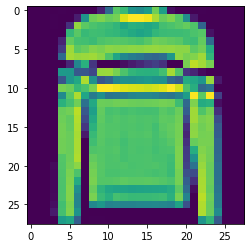

In [3]:
import matplotlib.pyplot as plt

plt.imshow(XTrain[5])

In [4]:
print(YTrain[5])

2


In [5]:
LabelData = {
 0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'AnkleBoot',
}

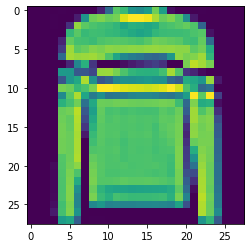

In [6]:
plt.imshow(XTrain[5])

Text(0.5, 1.0, '(Object: Pullover)')

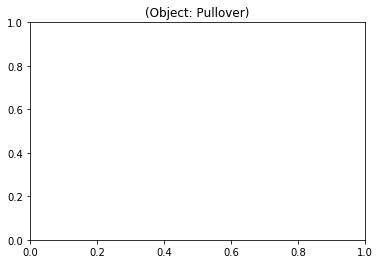

In [7]:
plt.title("(Object: " + str(LabelData[YTrain[5]]) + ")")

In [8]:
import numpy as np

unique, counts = np.unique(YTrain, return_counts=True)

In [9]:
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [10]:
unique, counts = np.unique(YTest, return_counts=True)

In [11]:
print (dict(zip(unique, counts)))

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [12]:
XTrain = XTrain / 255.0
XTest = XTest / 255.0

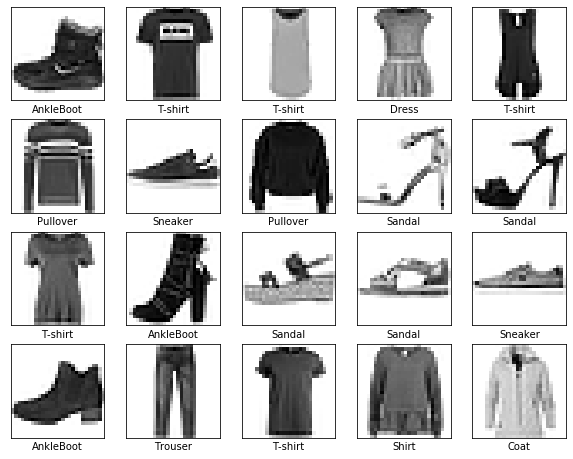

In [13]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(XTrain[i], cmap=plt.cm.binary)
    plt.xlabel(LabelData[YTrain[i]])

In [14]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Flatten, Activation
from keras.layers import Dense, MaxPool2D, Conv2D
from keras.initializers import Constant

XTrain = XTrain.reshape(XTrain.shape[0], 1, 28, 28)
XTest = XTest.reshape(XTest.shape[0], 1, 28, 28)
YTrain = np_utils.to_categorical(YTrain, 10)
YTest = np_utils.to_categorical(YTest, 10)

In [15]:
CNNModel = Sequential()

CNNModel.add(Conv2D(32,kernel_size=(2, 2), 
        padding='same', 
        activation='relu',
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform', 
        input_shape=(1, 28, 28)
    )
)

CNNModel.add(Activation('relu'))
CNNModel.add(MaxPool2D(padding='same'))
CNNModel.add(Conv2D(64,kernel_size=(2, 2), 
        padding='same', 
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform'
    )
)

CNNModel.add(Activation('relu'))
CNNModel.add(MaxPool2D(padding='same'))
CNNModel.add(Flatten())
CNNModel.add(Dense(128,
        activation='relu',
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform',         
    )
)

CNNModel.add(Dense(10, activation='softmax'))

In [16]:
CNNModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 64)         8256      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 64)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 448)              

In [ ]:
CNNModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
CNNModel.fit(XTrain, YTrain, epochs=1000,batch_size=32, verbose=1)


Epoch 1/1000
60000/60000 [==============================] - 7s 116us/step - loss: 0.5532 - accuracy: 0.7976
Epoch 2/1000
60000/60000 [==============================] - 5s 91us/step - loss: 0.3712 - accuracy: 0.8637
Epoch 3/1000
60000/60000 [==============================] - 5s 91us/step - loss: 0.3246 - accuracy: 0.8813
Epoch 4/1000
60000/60000 [==============================] - 5s 91us/step - loss: 0.2969 - accuracy: 0.8906
Epoch 5/1000
60000/60000 [==============================] - 5s 91us/step - loss: 0.2755 - accuracy: 0.8984
Epoch 6/1000
60000/60000 [==============================] - 5s 91us/step - loss: 0.2581 - accuracy: 0.9049
Epoch 7/1000
60000/60000 [==============================] - 6s 93us/step - loss: 0.2412 - accuracy: 0.9097
Epoch 8/1000
60000/60000 [==============================] - 6s 92us/step - loss: 0.2277 - accuracy: 0.9159
Epoch 9/1000
60000/60000 [==============================] - 6s 93us/step - loss: 0.2165 - accuracy: 0.9192
Epoch 10/1000
25856/60000 [========

In [ ]:
CNNModel.evaluate(XTest,YTest)

In [ ]:
Scores = CNNModel.evaluate(XTest,YTest, verbose=1)

print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])